In [9]:

def basic_s(n):
    """The sum of all divisors of n (except n). Brute force method, checking every number up to n/2 to see if its a divisor."""
    
    #list of divisors
    divisors = []

    #checks every number up to n to see if they are divisors, and if they are, add to the divisors list
    for i in range(1, (n//2 + 1)):                     #used integer division for odd numbers to make sure that it's not a decimal point. 
        if (n % i) == 0:
            divisors.append(i)
            
    #returns the sum of all divisors of n, except for n itself.
    return sum(divisors)

def smallest_factor(n):
    """Returns the smallest factor of a positive integer n. Taken from number_theory_lecture_functions from lecture 8.2 Appendix."""
    sqrt=n**0.5
    i=2
    while i<=sqrt:
        if n%i==0:
            return i                            #If we get here, return i as the value.
        i+=1
    return n                                    #If we get through the whole while loop, return n.
    
def decompose(n):
    """Generates a dictionary representing the prime decomposition. Taken from number_theory_lecture_functions from lecture 8.2 Appendix."""
    factors={}
    current_number=n                            #divide current_number by the factor found found until it reaches 1
    while current_number > 1:
        p=smallest_factor(current_number)
        if p in factors.keys():                 #if p is not a new factor, increase the power
            factors[p]+=1
        else:
            factors[p]=1                        #if p is a new factor, create a new entry
        current_number = current_number//p
    return factors

def s(n):      
    """The sum of all divisors of n (except n). Takes advantage of the fact that the sum of all divisors is a multiplicative function"""

    #gives the prime decomposition of n.
    k = decompose(n)
    result = 1

    for p in k.keys():
        result *= (p**(k[p]+1)-1)//(p-1)            #Uses the formula for the geometric series of the sum of divisors where k[p] is the prime power.
        
    return result - n                               #gives the sum of divisors without n.
def a(n, iterations, upper_limit):
    """Calculates the aliquot sequence of n within perameters Iterations and Upper Limit."""
    
    #the aliquot sequence of s(n) as a list, which is also the output.
    aliquot_seq = [n]
    
    for i in range(iterations - 1):

        next_term = s(n)
        sum_div = s(n)
        #if s(n) = 0 then the sequence terminates.
        if next_term == 0: 
            aliquot_seq.append(sum_div)
            return aliquot_seq

        #if s(n) is bigger than the upper limit, then the sequence terminates    
        elif next_term > upper_limit:
            return aliquot_seq

        #adds the current s(n) to the aliquot sequence and changes the input value to s(n)    
        else:
            aliquot_seq.append(sum_div)
            n = next_term    
            
    return aliquot_seq

def classify_a(a):
    for i in range(len(a)):
        for j in range(len(a)):
            if a[i] == a[j] and i < j:
                print("There is a loop")
                break
    return a

In [10]:
## creating a simplified loop detection that we can use for experimenting with loops
def loop_checker(up_to_n, iterations):

    # setting up boolean to identify if loop is detected
    is_loop = False
    loops = []
    
    for n in range(up_to_n):
        
        ali = a(n, iterations, 10**9)
        is_loop = False
        
        # checks if loop terminates at 0, and return False if so
        if ali[len(ali) - 1] == 0:
            is_loop = False
        # checks if loop is greater than limit, and returns False if so
        elif s(ali[len(ali) - 1]) > 10**9:
            is_loop = False
        
        else:
            for i in range(len(ali)):
                # detecting if the ith value is part of a looping aliquot sequence - if so,
                #  the current sequence must also loop
                if is_loop == True:
                    break
                # checking if two values are the same, hence indicating a loop
                for j in range(i + 1, len(ali)):
                    if ali[i] == ali[j]:
                        is_loop = True
                        loops.append(n)
                        break
    return loops


In [11]:
#q8

def type_summation(n):
    #We compare the value of n to the value of s(n) to find out if it's abundant or perfect or deficient.
    if s(n) > n:
        return "abundant"
    elif s(n) == n:
        return "perfect"
    else:
        return "deficient"



def analyse_loops(up_to_n, iterations):
    loops = loop_checker(up_to_n, iterations)
    
    for l in loops:
        aliquot = a(l, iterations, 10**9)
        # extract only the loop part
        loop_cycle = get_loop_cycle(aliquot)
        print("Loop cycle for", l, ":", loop_cycle)

        abundant = 0
        deficient = 0
        perfect = 0
        perfect_list = []

        for i in loop_cycle:
            ts = type_summation(i)
            if ts == "perfect":
                perfect += 1
                perfect_list.append(ts)
            elif ts == "abundant":
                abundant += 1
            elif ts == "deficient":
                deficient += 1
        print("In the loop starting at", l, "there are", abundant, "abundant numbers and", deficient, "deficient numbers")
        if deficient != 0:
            print(abundant/deficient, "is the ratio of abundant to deficient")
              
    

In [12]:
""" Function that finds all aliquot sequences up to n that loops within the inputted number of iterations by using the loop checkker function from question seven.
It counts the number of abundant and deficient numbers in over all looping aliquot sequences and gives the proportion of abundant to deficient terms.

"""
def get_loop_cycle(aliquot_sequence):
    """ We want to extract one cycle from a looping aliquot sequence.
    Going through each term of the inputted aliquot sequence, the code notes the first time each number appears, 
    and when a number appears a second time it returns the slice of the sequence between the first and second occurrence"""
    #dictionary of previous values
    seen = {}
    #enumerate the sequence and loop through each term, comparing each term to our list of previous terms
    for i, value in enumerate(aliquot_sequence):
        if value in seen:
            #slice to find the loop cycle: from where the loop started to the term before the repeating term
            return aliquot_sequence[seen[value]:i]
        seen[value] = i
    #if no loop is found, return an empty list
    return []

def analyse_loops2(up_to_n, iterations):
    """ We want to compare the number of abundant and deficient terms in aliquot sequences up to 'n'
    """
    #Create a list of looping aliquot sequences for all natural numbers up to n using the function loop_checker from Q7
    looping = loop_checker(up_to_n, iterations)
    total_loops = len(looping)
    #We want to count the total number of abundant, deficient and perfect terms, so first we set the totals to 0
    total_abundant = 0
    total_deficient = 0
    total_perfect = 0
    #We want to see which perfect numbers are found in loops. We ignore duplicates by making a set.
    perfect_numbers_overall = set()
    #We create an empty list for ratios of abundant to deficient terms
    ratios = []
    print("Looping cycles with a different number of abundant and deficient terms (if any)")
    
    """ We loop through each looping sequences, extracting the looping cycle and analysing it"""
    for l in looping:
        aliquot = a(l, iterations, 10**9)
        #Extracts the one cycle of the repeating section of the aliquot sequence
        loop_cycle = get_loop_cycle(aliquot) 
        #We want to count the number of each type of term
        abundant = 0
        deficient = 0
        perfect = 0
        #For each term in the looping cycle we increase the tally of perfect/abundant/deficient numbers
        for n in loop_cycle:
            n_type = type_summation(n)
            if n_type == "perfect":
                perfect += 1
                #If the loop is a repeating perfect number we add this number to our set of perfect nubmers
                perfect_numbers_overall.add(n)
            elif n_type == "abundant":
                abundant += 1
            elif n_type == "deficient":
                deficient += 1
        # Sum up each tally to find overall totals
        total_abundant += abundant
        total_deficient += deficient
        total_perfect += perfect
        #The fraction (Number of abundant terms)/(Number of deficient terms) is only defined if the number of deficient terms is not equal to 0
        if deficient != 0:
            ratios.append(abundant / deficient)
        #Loops with a different number of deficient to abundant terms are very rare so we want to print them for interest.
        #As several aliquot sequences contain the same loop, starting at different places, we only consider loops that start at the smallest term
        if l != min(loop_cycle):
            continue
        if abundant != deficient:
            print(loop_cycle)
            print(f"In this looping cycle there are {abundant} abundant numbers and {deficient} deficient numbers")

    # Summary over all loops
    print()
    print(f"Summary of all loops up to {up_to_n} with less than {iterations} iterations:")
    print()
    print(f"Total number of loops detected: {total_loops}")
    print(f"Total number of  abundant numbers in loops detected: {total_abundant}")
    print(f"Total number deficient numbers in loops detected: {total_deficient}")
    print(f"Total number perfect numbers in loops detected: {total_perfect}")
    print(f"Set of perfect numbers observed: {sorted(list(perfect_numbers_overall))}")
    avg_ratio = sum(ratios) / len(ratios)
    print("Average value of the fraction: (abundant numbers)/(deficient numbers) across loops:", avg_ratio)


In [13]:
analyse_loops2(15000,30)


Looping cycles with a different number of abundant and deficient terms (if any)
[12496, 14288, 15472, 14536, 14264]
In this looping cycle there are 2 abundant numbers and 3 deficient numbers
[14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716]
In this looping cycle there are 12 abundant numbers and 16 deficient numbers

Summary of all loops up to 15000 with less than 30 iterations:

Total number of loops detected: 335
Total number of  abundant numbers in loops detected: 252
Total number deficient numbers in loops detecttted: 274
Total number perfect numbers in loops detected: 133
Set of perfect numbers observed: [6, 28, 496, 8128]
Average value of the fraction: (abundant numbers)/(deficient numbers) across loops: 0.9851485148514851


As the total abundant numbers is very simlar to total deficient numbers we can see that cycles are relatively stable.
No loops are purely abundant or deficient, which makes sense since purely abundant cycles would grow infinitely and purely deficient cycles would shrink to 0.
This is why loops exist at all: s(n) produces repeating sequences only when upward and downward moves offset each other.

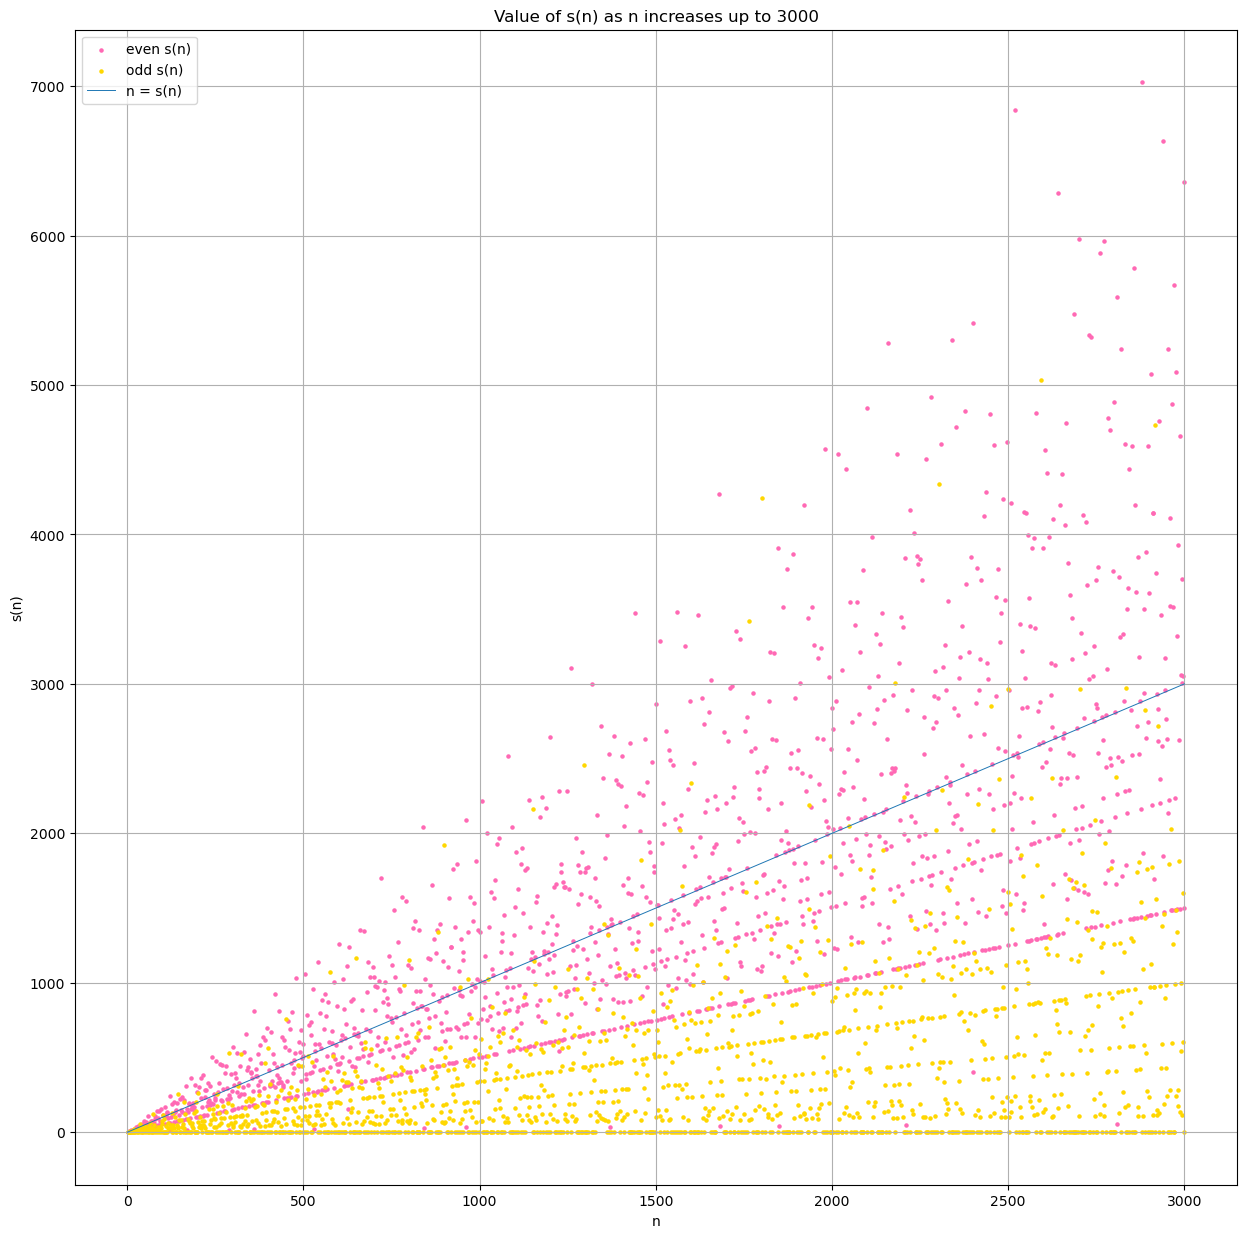

In [7]:
import numpy as np
import matplotlib.pyplot as plt
"""We plot a scatter graph of s(n) against n to investigate how being odd or even relates to being abundant or deficient"""
def q8plot(n):
    # plotting a line plot after changing it's width and height
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(15)
    x = np.array(range(1, n+1))
    s_n = np.array([s(k) for k in x])
    even_mask = (s_n % 2 == 0)
    odd_mask  = ~even_mask  # same as (s_n % 2 == 1)
    two_mask = (n)

    even_s = s_n[even_mask]
    odd_s  = s_n[odd_mask]
  
    plt.scatter(x[even_mask], even_s, label = 'even s(n)', s=(5), color = 'hotpink')
    plt.scatter(x[odd_mask], odd_s, label = 'odd s(n)', s=(5), color = 'gold')
    plt.plot(x, x, label = 'n = s(n)', linewidth=(0.7))
    #find line of best fit
    a, b = np.polyfit(x, s_n, 1)
    #add line of best fit to plot
    #plt.plot(x, a*x+b, linewidth = (0.7), color = ("black"), label = 'line of best fit of s(n)')
    plt.xlabel('n')
    plt.ylabel('s(n)')
    plt.title('Value of s(n) as n increases up to 3000')
    plt.legend()
    plt.grid()
    '''
    plt.xticks(np.arange(0, n+1, 2))
    plt.grid(axis='x')
    '''
    plt.show
q8plot(3000)

The graph shows the value of s(n) for each integer n up to 3000. We plotted the blue line n = s(n) to allow us to visually compare the the distribution of abundant and deficient numbers. The points above the blue line represent abundant numbers and the points below the line represent deficient numbers. 

There are many points along the horizontal line s(n) = 1, which represent prime numbers up to 3000.

It is evident that that deficient numbers are more common than abundant numbers for integers. 
Nearly all abundant numbers are even, which is predictable since even numbers tend to have more factors.

For terms in aliquot sequences starting from 1 to 3000 with up to 30 terms each:
Abundant: 14727
Perfect: 1080
Deficient: 20030
The number of sequences that terminate at 0: 1834
The number of sequences that terminate at a loop: 48
The number of sequences that terminate because a value of a term has exceeded i: 84
The number of sequences that terminate because they have more terms than k: 34


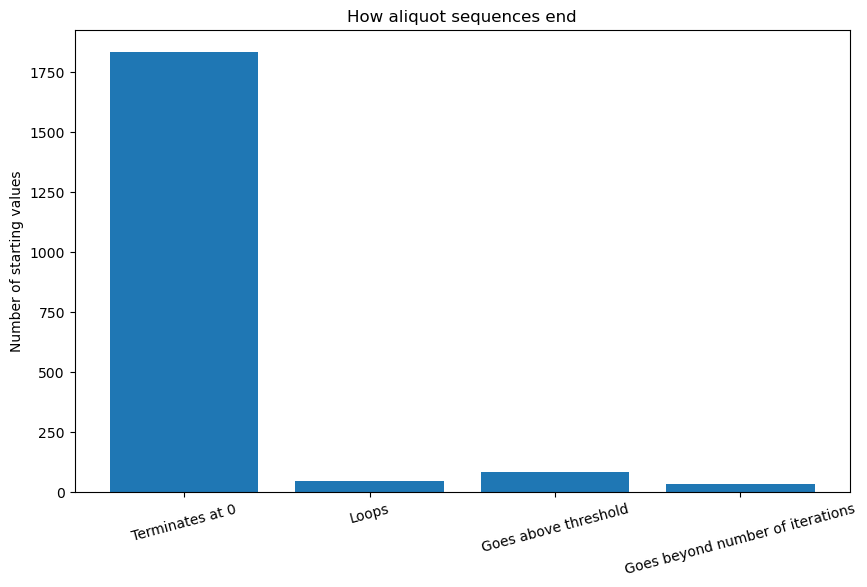

The number of sequences that terminate at 0: 1834
The number of sequences that terminate at a loop: 48
The number of sequences that terminate because a value of a term has exceeded i: 84
The number of sequences that terminate because they have more terms than k: 34


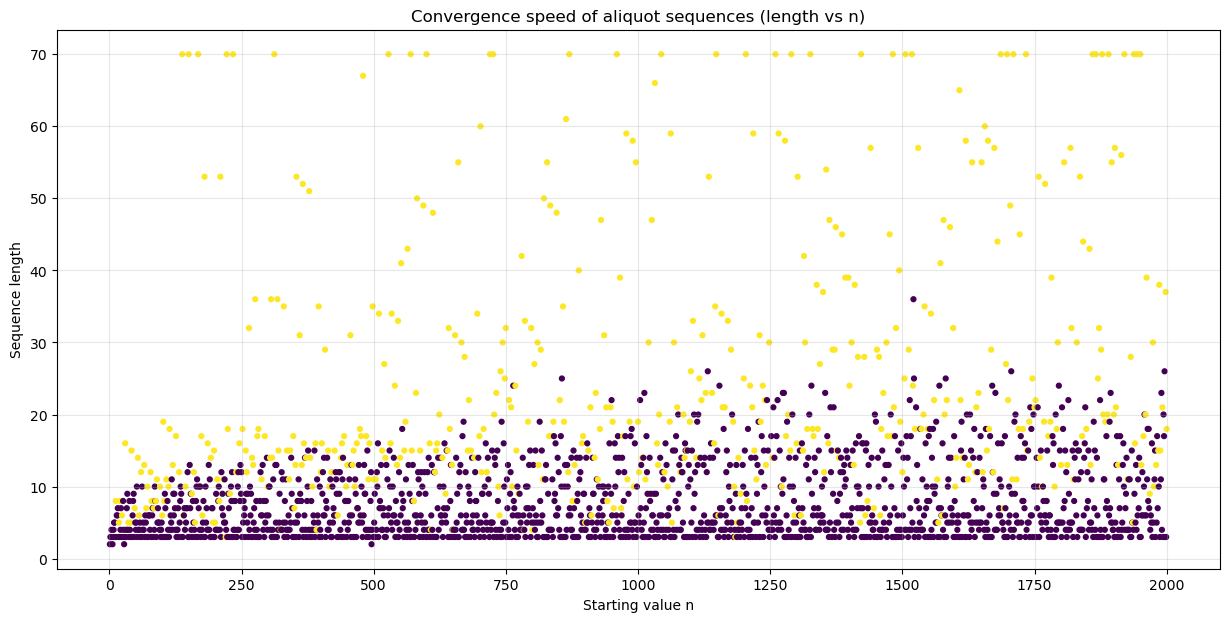

In [8]:

def count_of_sequences(A, iterations, upper_limit):
    """
    Finds aliquot sequences starting at every integer up to A
    The number of iterations is limited to k
    The function counts the number of abundant, perfect and deficient terms across all these sequences"""
    #Define the counts of each category to start at 0
    abundant = 0
    perfect = 0
    deficient = 0

    #Defining a loop that goes from number 1 up to A and generates an aliquot sequence with up to k terms for each of these numbers
    for n in range(1, A + 1):
        #We specifically generate the aliquot sequence for that n in the range 1 to A+1 using the a(n, iterations, upper_limit)
        sequence = a(n, iterations, upper_limit)

        #Now we define a loop that goes through each term in the sequence and categorises them based off of their sum of proper divisors (like above)
        for each_term in sequence:

            #Classify each of the terms in this specific sequence using previously defined function type_summation(n)
            category = type_summation(each_term)

            if category == "abundant":
                abundant = abundant + 1
            elif category == "perfect":
                perfect = perfect + 1
            else:
                deficient = deficient + 1

    print("For terms in aliquot sequences starting from 1 to " + str(A) + " with up to " + str(iterations) + " terms each:")
    print("Abundant: " +str(abundant))
    print("Perfect: " +str(perfect))
    print("Deficient: " +str(deficient))

count_of_sequences(3000, 30, 10**9)
print()

# I want to now focus on convergence of aliquot sequences ... i think this is going to be hard! I first need to create some code that will 
# establish the length of aliquot sequences when they end (for whatever reason) - i'm going to essentially add onto/use the code from question 4

def sequence_length(n, k, upper_limit):
    
    #We create a set that initially contains n and used to store terms that haven't repeated yet
    repeats = [n]
    #Currently there is only 1 term in the set, so the length is 1
    length = 1

    #Generate k terms of  
    for i in range(k - 1):

        #Want to find the next term in the sequence
        next_term = s(n)

        #Option 1: If the next term reaches 0 the sequence has terminated
        if next_term == 0:
            length = length + 1
            return "zero", length

        #Option 2: next term exceeds upper_limit
        if next_term > upper_limit:
            length = length + 1
            return "upper_limit", length 

        #Option 3: next term is a repetition of a previous term
        if next_term in repeats:
            length = length + 1
            return "loop", length

        #If term NOT in 'repeats' - add this term to set of repeats and continue sequence
        repeats.append(next_term)
        n = next_term
        length = length + 1

    #Option 4 - there are greater than k terms  
    return "k_limit", length


#Following the pattern of question 4, I now want to use the function I've just created to compute how aliquot sequences behave for every n, in the range (1, m)

# m is the largest starting value, k is the maximum number of terms and upper_limit is the largest value a term can have
def convergence(m, k, upper_limit):

    #Starting at 0 for each
    zero = loop = upper_limit_count = k_limit = 0

    #This will store the length of the sequence for each starting value n
    lengths = []

    #We want to test for each n from 1 up to m 
    for n in range(1, m+1):

        #How does the sequence end and how long is it?
        reason, length = sequence_length(n, k, upper_limit)

        #I need this for when I want to start plotting something - it's storing length n=1, length n=2 etc
        lengths.append(length)

        #We want to increase the relevant category
        if reason == "zero":
            zero = zero + 1
        elif reason == "loop":
            loop = loop + 1
        elif reason == "upper_limit":
            upper_limit_count = upper_limit_count + 1
        elif reason == "k_limit":
            k_limit = k_limit + 1

    #adds names
    names = ['Terminates at 0', 'Loops', 'Goes above threshold', 'Goes beyond number of iterations']
    counts = [zero, loop, upper_limit_count, k_limit]

    print('The number of sequences that terminate at 0: ' + str(zero))
    print('The number of sequences that terminate at a loop: ' + str(loop))
    print('The number of sequences that terminate because a value of a term has exceeded the upper limit: ' + str(upper_limit_count))
    print('The number of sequences that terminate because they have more terms than k: ' + str(k_limit))
   # print('The lengths are: ' + str(lengths))

    return names, counts, lengths


#Plotting a bar chart first 

m = 2000
k = 70
upper_limit = 10**9

#My function convergence(m, k, upper_limit) returns 3 things: names, counts, lengths
names, counts, lengths = convergence(m, k, upper_limit)

plt.figure(figsize=(10,6))
plt.bar(names, counts)
plt.xticks(rotation=15)
plt.ylabel("Number of starting values")
plt.title("How aliquot sequences end")
plt.show()

#Plot a scatter graph to investigate convergence speed of aliquot sequences starting at n 

m = 2000
k = 70
upper_limit = 10**9

#My function convergence(m, k, upper_limit) returns 3 things: names, counts, lengths
names, counts, lengths = convergence(m, k, upper_limit)
x_vals = range(1, m+1)
#This is the set of starting values n, from 1 to m
abundant_mask  = [type_summation(x) == "abundant"  for x in x_vals]
deficient_mask = [type_summation(x) == "deficient" for x in x_vals]
perfect_mask   = [type_summation(x) == "perfect"   for x in x_vals]
#This is the list of sequence lengths returned by the convergence function above
y_vals = lengths

plt.figure(figsize = (15, 7))
plt.scatter(x_vals, y_vals, c=abundant_mask, s=12)
plt.xlabel('Starting value n')
plt.ylabel('Sequence length')
plt.title('Convergence speed of aliquot sequences (length vs n)')
plt.grid(True, alpha = 0.3)
plt.show()

#This tells us that most sequences converge quickly because their lengths are quite short. 
#This is related to the fact that most numbers under 2000 are deficient, and as values shrink they rarely have large divisoors.
#Most sequence lenghts are small because most numbers less than 2000 are deficient

The purple points are for deficient values of n and the yellow values are for abundant values of n. It is clear that longer aliquot sequences with starting values up to 2000 all start with abundant numbers while most short sequences start with deficient numbers. This is because abundant numbers cause sequences to rise, and may have potential to rise and rise beyond our cut off.

